<a href="https://colab.research.google.com/github/EugeneDyw/Stat6289/blob/main/HW3/TSLAnew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

file_path='/content/drive/MyDrive/Colab Notebooks/6289HW3/TSLA.csv'
# Load data from the provided CSV file and parse dates
data = pd.read_csv(file_path, parse_dates=True, index_col="Date")



In [3]:
# Create dataset function
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset.iloc[i:(i + look_back), 0]  # assuming 'Close' column is the first
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])  # target is the 'Close' value after the look_back period
    return np.array(dataX), np.array(dataY)


1. Use a LSTM model with 2 layers, batch size=32 to see which time lag performs better

In [3]:
def train_lstm_model(X_train, y_train, units=256, hidden_layers=2, batch_size=32, epochs=10):
    model_lap = Sequential()

    # First LSTM layer
    model_lap.add(LSTM(units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model_lap.add(Dropout(0.5))


    for _ in range(hidden_layers - 1):
        model_lap.add(LSTM(units, activation='relu', return_sequences=True if _ < hidden_layers - 2 else False))
        model_lap.add(Dropout(0.5))


    model_lap.add(Dense(1))
    # Compile model
    model_lap.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
    history = model_lap.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    return model_lap, history


Epoch 1/10
38/38 [==============================] - 5s 20ms/step - loss: 0.0188
Epoch 2/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0151
Epoch 3/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 5/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0064
Epoch 6/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0053
Epoch 7/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0052
Epoch 8/10
38/38 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 9/10
38/38 [==============================] - 0s 10ms/step - loss: 0.0048
Epoch 10/10
38/38 [==============================] - 0s 12ms/step - loss: 0.0047


3/3 [==============================] - 0s 5ms/step


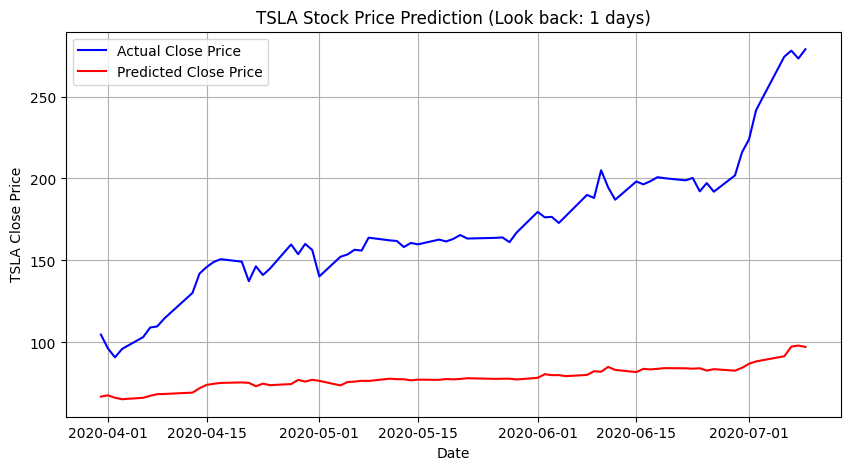

Epoch 1/10
37/37 [==============================] - 5s 33ms/step - loss: 0.0133
Epoch 2/10
37/37 [==============================] - 1s 34ms/step - loss: 0.0033
Epoch 3/10
37/37 [==============================] - 1s 31ms/step - loss: 0.0017
Epoch 4/10
37/37 [==============================] - 1s 32ms/step - loss: 7.6667e-04
Epoch 5/10
37/37 [==============================] - 1s 33ms/step - loss: 7.0802e-04
Epoch 6/10
37/37 [==============================] - 1s 33ms/step - loss: 7.8731e-04
Epoch 7/10
37/37 [==============================] - 1s 34ms/step - loss: 7.2176e-04
Epoch 8/10
37/37 [==============================] - 2s 41ms/step - loss: 6.5460e-04
Epoch 9/10
37/37 [==============================] - 3s 71ms/step - loss: 7.0771e-04
Epoch 10/10
37/37 [==============================] - 2s 47ms/step - loss: 7.3570e-04


3/3 [==============================] - 0s 9ms/step


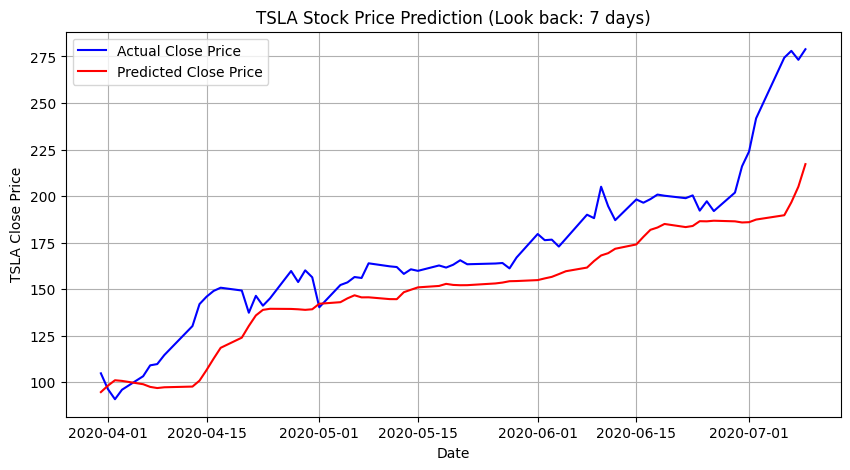

Epoch 1/10
37/37 [==============================] - 6s 73ms/step - loss: 0.0107
Epoch 2/10
37/37 [==============================] - 2s 59ms/step - loss: 0.0022
Epoch 3/10
37/37 [==============================] - 4s 112ms/step - loss: 0.0012
Epoch 4/10
37/37 [==============================] - 2s 64ms/step - loss: 0.0011
Epoch 5/10
37/37 [==============================] - 2s 58ms/step - loss: 9.2386e-04
Epoch 6/10
37/37 [==============================] - 2s 56ms/step - loss: 9.6246e-04
Epoch 7/10
37/37 [==============================] - 2s 57ms/step - loss: 9.4116e-04
Epoch 8/10
37/37 [==============================] - 2s 63ms/step - loss: 0.0010
Epoch 9/10
37/37 [==============================] - 4s 114ms/step - loss: 9.6977e-04
Epoch 10/10
3/3 [==============================] - 0s 12ms/step


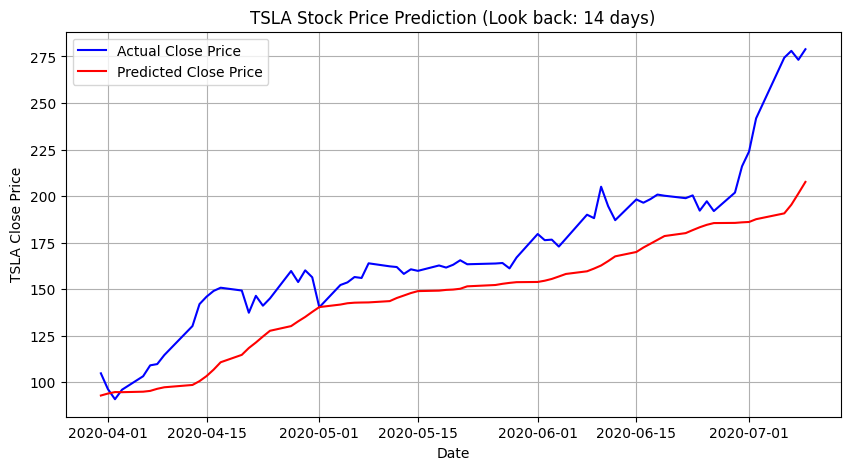

In [7]:
# List of look_back values to compare
look_back_values = [1, 7, 14]

# Iterate over each look_back value
for look_back in look_back_values:

    # Prepare dataset
    X, Y = create_dataset(data[['Close']], look_back)

    # Initialize and fit the scalers for each iteration
    X_scaler = MinMaxScaler()
    X_normalized = X_scaler.fit_transform(X)

    Y_scaler = MinMaxScaler()
    Y_normalized = Y_scaler.fit_transform(Y.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.0556, shuffle=False)

    # Train the LSTM model and store the training history
    model_lap, history = train_lstm_model(X_train, y_train, units=256, hidden_layers=2, batch_size=32, epochs=10)


    # Predict prices
    predicted_prices = model_lap.predict(X_test)
    predicted_closing_prices = Y_scaler.inverse_transform(predicted_prices)
    actual_closing_prices = Y_scaler.inverse_transform(y_test)

    # Results DataFrame
    results_df = pd.DataFrame({
        'Actual_Close_Price': actual_closing_prices.flatten(),
        'Predicted_Close_Price': predicted_closing_prices.flatten()
    })

    # Visualization
    plt.figure(figsize=(10,5))
    plt.title(f'TSLA Stock Price Prediction (Look back: {look_back} days)')
    plt.plot(data.index[look_back:][len(X_train):], actual_closing_prices, label='Actual Close Price', color='b')
    plt.plot(data.index[look_back:][len(X_train):], predicted_closing_prices, label='Predicted Close Price', color='r')
    plt.xlabel('Date')
    plt.ylabel('TSLA Close Price')
    plt.grid(True)
    plt.legend()
    plt.show()



Use time lag=7 to compare different models

In [12]:

#Time lag can be changed to 1 or 14 days. Use 7 here since it performs best
look_back = 7
X, Y = create_dataset(data[['Close']], look_back)

# Normalize the data
X_scaler = MinMaxScaler()
X_normalized = X_scaler.fit_transform(X)

Y_scaler = MinMaxScaler()
# Assuming Y is your array
Y = Y.reshape(-1, 1)  # Reshape Y to be a 2D array.
Y_normalized = Y_scaler.fit_transform(Y)
#Y_normalized = Y_scaler.fit_transform(Y.reshape(-1, 1))

# Reshape the input data for LSTM: [samples, time steps, features]
X_train, X_test, y_train, y_test = train_test_split(X_normalized[:, :, np.newaxis], Y_normalized, test_size=0.0556, shuffle=False)

print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



x_train shape: (1182, 7, 1)
1182 train samples
70 test samples


Train models with different hidden layers(1, 2 or 4) and different batch size(64, 32 or 16)

Visualize the result

Epoch 1/30
19/19 [==============================] - 10s 79ms/step - loss: 0.0178
Epoch 2/30
19/19 [==============================] - 1s 73ms/step - loss: 0.0105
Epoch 3/30
19/19 [==============================] - 1s 77ms/step - loss: 0.0065
Epoch 4/30
19/19 [==============================] - 2s 112ms/step - loss: 0.0060
Epoch 5/30
19/19 [==============================] - 3s 148ms/step - loss: 0.0055
Epoch 6/30
19/19 [==============================] - 1s 76ms/step - loss: 0.0042
Epoch 7/30
19/19 [==============================] - 1s 71ms/step - loss: 0.0019
Epoch 8/30
19/19 [==============================] - 1s 76ms/step - loss: 0.0010
Epoch 9/30
19/19 [==============================] - 1s 73ms/step - loss: 0.0010
Epoch 10/30
19/19 [==============================] - 1s 76ms/step - loss: 0.0011
Epoch 11/30
19/19 [==============================] - 1s 74ms/step - loss: 0.0010
Epoch 12/30
19/19 [==============================] - 2s 79ms/step - loss: 0.0010
Epoch 13/30
19/19 [===============

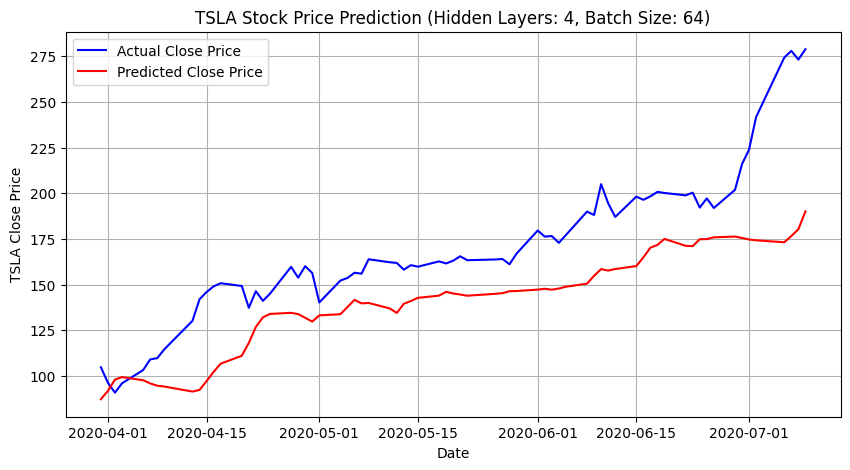

Epoch 1/30
19/19 [==============================] - 6s 46ms/step - loss: 0.0179
Epoch 2/30
19/19 [==============================] - 1s 46ms/step - loss: 0.0101
Epoch 3/30
19/19 [==============================] - 1s 46ms/step - loss: 0.0049
Epoch 4/30
19/19 [==============================] - 1s 61ms/step - loss: 0.0039
Epoch 5/30
19/19 [==============================] - 2s 109ms/step - loss: 0.0027
Epoch 6/30
19/19 [==============================] - 2s 102ms/step - loss: 0.0015
Epoch 7/30
19/19 [==============================] - 1s 46ms/step - loss: 9.4266e-04
Epoch 8/30
19/19 [==============================] - 1s 43ms/step - loss: 8.2117e-04
Epoch 9/30
19/19 [==============================] - 1s 44ms/step - loss: 8.9796e-04
Epoch 10/30
19/19 [==============================] - 1s 45ms/step - loss: 8.7321e-04
Epoch 11/30
19/19 [==============================] - 1s 47ms/step - loss: 8.3671e-04
Epoch 12/30
19/19 [==============================] - 1s 45ms/step - loss: 9.1241e-04
Epoch 13/30

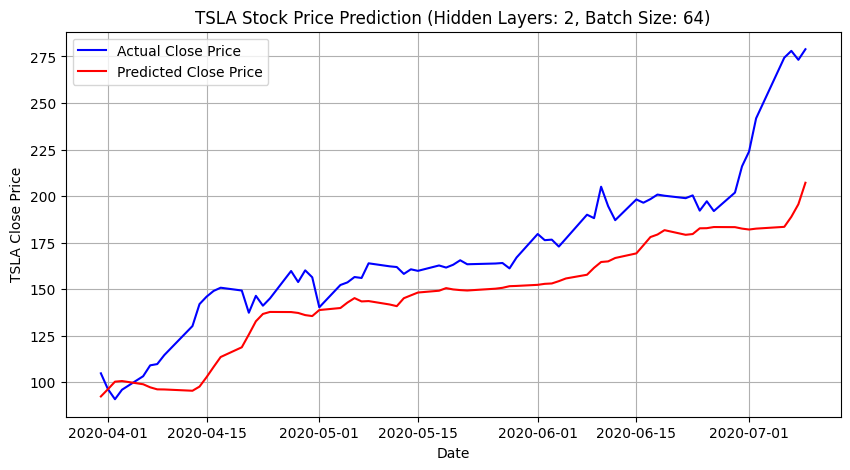

Epoch 1/30
19/19 [==============================] - 3s 32ms/step - loss: 0.0174
Epoch 2/30
19/19 [==============================] - 1s 59ms/step - loss: 0.0100
Epoch 3/30
19/19 [==============================] - 1s 69ms/step - loss: 0.0043
Epoch 4/30
19/19 [==============================] - 1s 68ms/step - loss: 0.0032
Epoch 5/30
19/19 [==============================] - 1s 60ms/step - loss: 0.0024
Epoch 6/30
19/19 [==============================] - 1s 37ms/step - loss: 0.0017
Epoch 7/30
19/19 [==============================] - 1s 36ms/step - loss: 0.0010
Epoch 8/30
19/19 [==============================] - 1s 34ms/step - loss: 7.7034e-04
Epoch 9/30
19/19 [==============================] - 1s 33ms/step - loss: 8.3583e-04
Epoch 10/30
19/19 [==============================] - 1s 35ms/step - loss: 7.9784e-04
Epoch 11/30
19/19 [==============================] - 1s 33ms/step - loss: 7.6798e-04
Epoch 12/30
19/19 [==============================] - 1s 33ms/step - loss: 7.1703e-04
Epoch 13/30
19/19

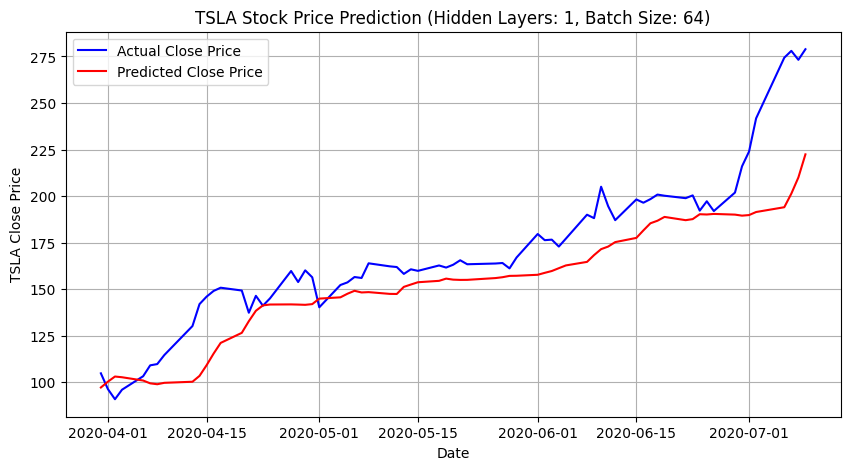

Epoch 1/30
37/37 [==============================] - 11s 78ms/step - loss: 0.0140
Epoch 2/30
37/37 [==============================] - 3s 77ms/step - loss: 0.0065
Epoch 3/30
37/37 [==============================] - 4s 119ms/step - loss: 0.0054
Epoch 4/30
37/37 [==============================] - 5s 140ms/step - loss: 0.0024
Epoch 5/30
37/37 [==============================] - 3s 77ms/step - loss: 0.0011
Epoch 6/30
37/37 [==============================] - 3s 79ms/step - loss: 0.0010
Epoch 7/30
37/37 [==============================] - 3s 75ms/step - loss: 9.4188e-04
Epoch 8/30
37/37 [==============================] - 5s 140ms/step - loss: 0.0010
Epoch 9/30
37/37 [==============================] - 3s 79ms/step - loss: 8.9396e-04
Epoch 10/30
37/37 [==============================] - 3s 77ms/step - loss: 9.9030e-04
Epoch 11/30
37/37 [==============================] - 3s 77ms/step - loss: 0.0010
Epoch 12/30
37/37 [==============================] - 5s 141ms/step - loss: 0.0011
Epoch 13/30
37/37 [=

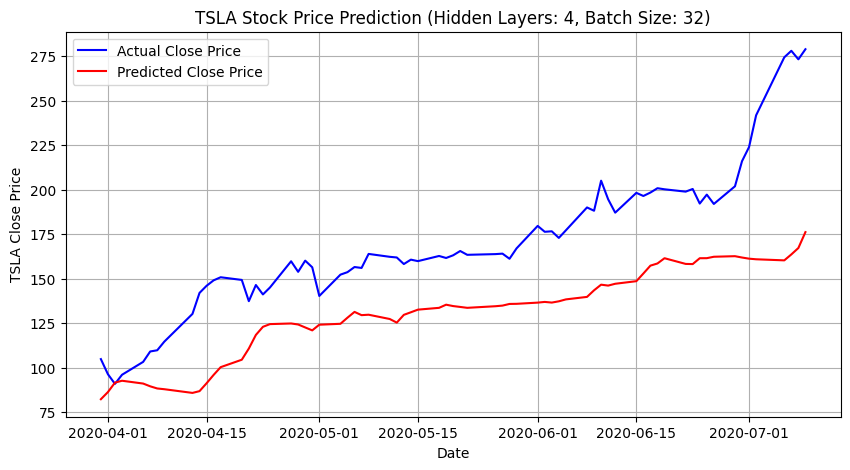

Epoch 1/30
37/37 [==============================] - 7s 90ms/step - loss: 0.0148
Epoch 2/30
37/37 [==============================] - 3s 70ms/step - loss: 0.0045
Epoch 3/30
37/37 [==============================] - 2s 49ms/step - loss: 0.0026
Epoch 4/30
37/37 [==============================] - 2s 50ms/step - loss: 0.0012
Epoch 5/30
37/37 [==============================] - 2s 44ms/step - loss: 9.7780e-04
Epoch 6/30
37/37 [==============================] - 2s 43ms/step - loss: 8.7883e-04
Epoch 7/30
37/37 [==============================] - 2s 45ms/step - loss: 9.6154e-04
Epoch 8/30
37/37 [==============================] - 3s 82ms/step - loss: 9.9232e-04
Epoch 9/30
37/37 [==============================] - 3s 67ms/step - loss: 8.9565e-04
Epoch 10/30
37/37 [==============================] - 2s 42ms/step - loss: 7.8297e-04
Epoch 11/30
37/37 [==============================] - 2s 43ms/step - loss: 7.9297e-04
Epoch 12/30
37/37 [==============================] - 2s 42ms/step - loss: 8.8302e-04
Epoch

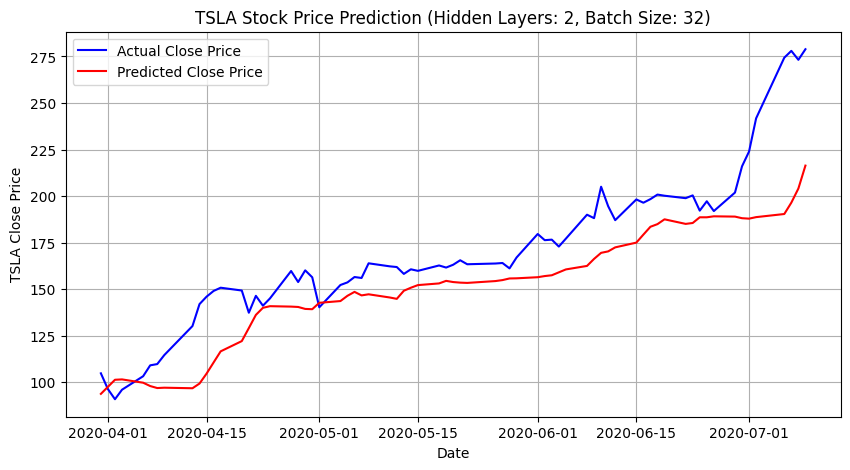

Epoch 1/30
37/37 [==============================] - 5s 38ms/step - loss: 0.0128
Epoch 2/30
37/37 [==============================] - 1s 30ms/step - loss: 0.0034
Epoch 3/30
37/37 [==============================] - 1s 32ms/step - loss: 0.0018
Epoch 4/30
37/37 [==============================] - 1s 30ms/step - loss: 8.2713e-04
Epoch 5/30
37/37 [==============================] - 1s 30ms/step - loss: 6.9276e-04
Epoch 6/30
37/37 [==============================] - 1s 30ms/step - loss: 7.4888e-04
Epoch 7/30
37/37 [==============================] - 1s 30ms/step - loss: 8.3933e-04
Epoch 8/30
37/37 [==============================] - 1s 31ms/step - loss: 6.9617e-04
Epoch 9/30
37/37 [==============================] - 1s 31ms/step - loss: 7.2268e-04
Epoch 10/30
37/37 [==============================] - 2s 58ms/step - loss: 6.7831e-04
Epoch 11/30
37/37 [==============================] - 2s 66ms/step - loss: 7.1113e-04
Epoch 12/30
37/37 [==============================] - 1s 30ms/step - loss: 7.8781e-04
E

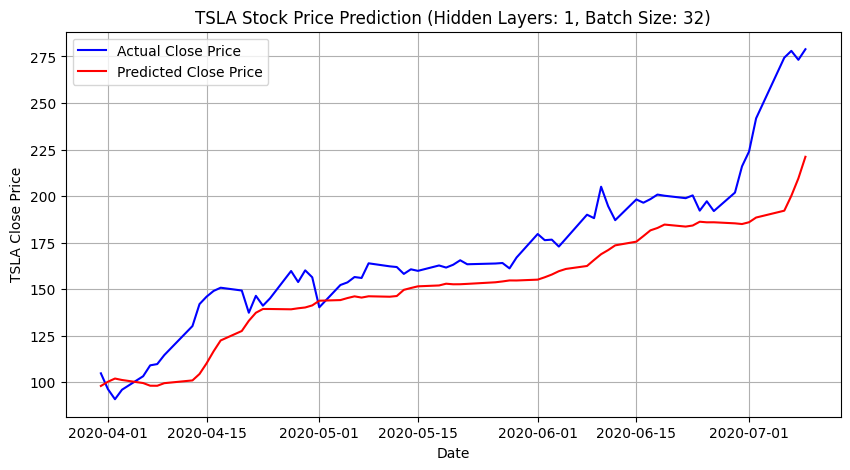

Epoch 1/30
74/74 [==============================] - 13s 83ms/step - loss: 0.0107
Epoch 2/30
74/74 [==============================] - 7s 94ms/step - loss: 0.0043
Epoch 3/30
74/74 [==============================] - 5s 74ms/step - loss: 0.0011
Epoch 4/30
74/74 [==============================] - 7s 101ms/step - loss: 0.0013
Epoch 5/30
74/74 [==============================] - 5s 72ms/step - loss: 0.0011
Epoch 6/30
74/74 [==============================] - 8s 104ms/step - loss: 0.0011
Epoch 7/30
74/74 [==============================] - 5s 71ms/step - loss: 0.0010
Epoch 8/30
74/74 [==============================] - 8s 103ms/step - loss: 0.0011
Epoch 9/30
74/74 [==============================] - 6s 76ms/step - loss: 0.0010
Epoch 10/30
74/74 [==============================] - 8s 114ms/step - loss: 0.0011
Epoch 11/30
74/74 [==============================] - 6s 78ms/step - loss: 0.0012
Epoch 12/30
74/74 [==============================] - 8s 103ms/step - loss: 9.3505e-04
Epoch 13/30
74/74 [========

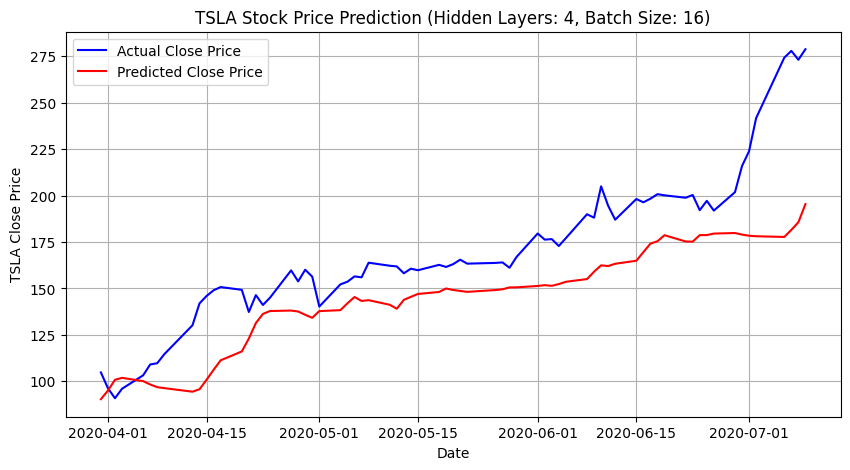

Epoch 1/30
74/74 [==============================] - 9s 49ms/step - loss: 0.0098
Epoch 2/30
74/74 [==============================] - 4s 58ms/step - loss: 0.0023
Epoch 3/30
74/74 [==============================] - 6s 74ms/step - loss: 9.6406e-04
Epoch 4/30
74/74 [==============================] - 4s 49ms/step - loss: 8.2423e-04
Epoch 5/30
74/74 [==============================] - 4s 50ms/step - loss: 8.6891e-04
Epoch 6/30
74/74 [==============================] - 6s 81ms/step - loss: 8.8350e-04
Epoch 7/30
74/74 [==============================] - 4s 51ms/step - loss: 0.0011
Epoch 8/30
74/74 [==============================] - 4s 52ms/step - loss: 8.4284e-04
Epoch 9/30
74/74 [==============================] - 6s 84ms/step - loss: 7.8686e-04
Epoch 10/30
74/74 [==============================] - 4s 52ms/step - loss: 8.6256e-04
Epoch 11/30
74/74 [==============================] - 4s 49ms/step - loss: 7.7508e-04
Epoch 12/30
74/74 [==============================] - 5s 70ms/step - loss: 7.4698e-04
E

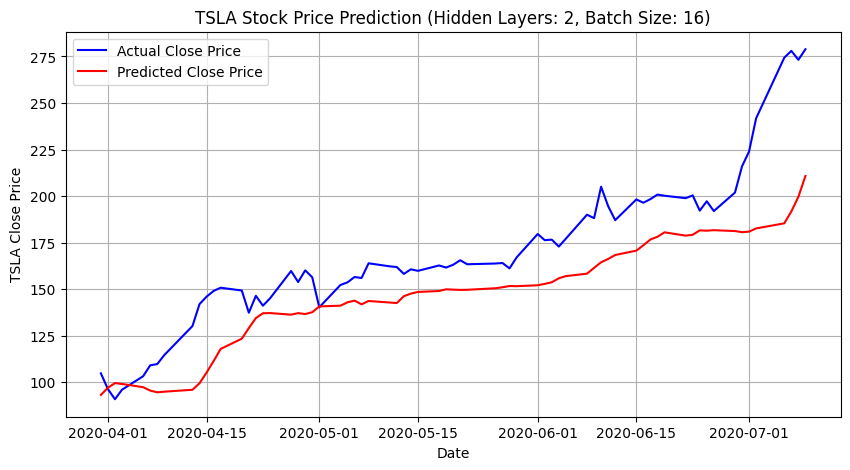

Epoch 1/30
74/74 [==============================] - 5s 34ms/step - loss: 0.0094
Epoch 2/30
74/74 [==============================] - 3s 42ms/step - loss: 0.0020
Epoch 3/30
74/74 [==============================] - 4s 60ms/step - loss: 8.7685e-04
Epoch 4/30
74/74 [==============================] - 3s 35ms/step - loss: 7.6027e-04
Epoch 5/30
74/74 [==============================] - 3s 36ms/step - loss: 7.1367e-04
Epoch 6/30
74/74 [==============================] - 3s 35ms/step - loss: 7.2174e-04
Epoch 7/30
74/74 [==============================] - 4s 49ms/step - loss: 7.6741e-04
Epoch 8/30
74/74 [==============================] - 4s 53ms/step - loss: 6.8782e-04
Epoch 9/30
74/74 [==============================] - 3s 34ms/step - loss: 6.9176e-04
Epoch 10/30
74/74 [==============================] - 2s 33ms/step - loss: 6.9120e-04
Epoch 11/30
74/74 [==============================] - 3s 34ms/step - loss: 7.5552e-04
Epoch 12/30
74/74 [==============================] - 4s 53ms/step - loss: 7.5947e-

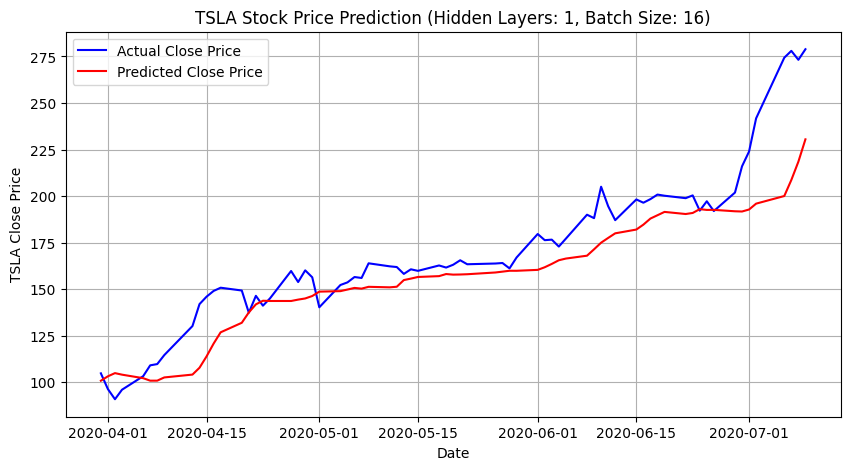

In [15]:
# Define different model configurations
model_configs = [
    {'hidden_layers': 4, 'batch_size': 64},
    {'hidden_layers': 2, 'batch_size': 64},
    {'hidden_layers': 1, 'batch_size': 64},
    {'hidden_layers': 4, 'batch_size': 32},
    {'hidden_layers': 2, 'batch_size': 32},
    {'hidden_layers': 1, 'batch_size': 32},
    {'hidden_layers': 4, 'batch_size': 16},
    {'hidden_layers': 2, 'batch_size': 16},
    {'hidden_layers': 1, 'batch_size': 16}
]

test_start_index = len(X_train)


# Train and evaluate models with different configurations
for config in model_configs:
    hidden_layers = config['hidden_layers']
    batch_size = config['batch_size']

    #Avtivation Function: ReLU, Drop out:50%
    model = Sequential()
    for _ in range(hidden_layers):
        model.add(LSTM(units=256, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
        model.add(Dropout(0.5))
    model.add(LSTM(units=256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    #model.summary()
    #opt: ADAM, Loss: MSE
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=30, batch_size=batch_size)


    #Prediction
    predicted_prices = model.predict(X_test)

    predicted_closing_prices = Y_scaler.inverse_transform(predicted_prices)
    actual_closing_prices = Y_scaler.inverse_transform(y_test)

    results_df = pd.DataFrame({
        'Actual_Close_Price': actual_closing_prices.flatten(),
        'Predicted_Close_Price': predicted_closing_prices.flatten()
    })

    #Display the results table
    print(results_df)

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.title(f'TSLA Stock Price Prediction (Hidden Layers: {hidden_layers}, Batch Size: {batch_size})')
    plt.plot(data.index[test_start_index + look_back:], actual_closing_prices, label='Actual Close Price', color='b')
    plt.plot(data.index[test_start_index + look_back:], predicted_closing_prices, label='Predicted Close Price', color='r')

    #plt.plot(data.index[test_start_index + look_back:], actual_closing_prices, label='Actual Close Price', color='b')
    #plt.plot(data.index[test_start_index + look_back:], predicted_closing_prices, label='Predicted Close Price', color='r')
    plt.xlabel('Date')
    plt.ylabel('TSLA Close Price')
    plt.grid(True)
    plt.legend()
    plt.show()



Future Prediction using model with 1 hidden layer and batch size 16

In [13]:
def create_dataset_new(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)


Epoch 1/15
75/75 [==============================] - 2s 10ms/step - loss: 0.0183
Epoch 2/15
75/75 [==============================] - 1s 9ms/step - loss: 0.0143
Epoch 3/15
75/75 [==============================] - 1s 9ms/step - loss: 0.0112
Epoch 4/15
75/75 [==============================] - 1s 9ms/step - loss: 0.0088
Epoch 5/15
75/75 [==============================] - 0s 6ms/step - loss: 0.0070
Epoch 6/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 7/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 8/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0051
Epoch 9/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 10/15
75/75 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 11/15
75/75 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 12/15
75/75 [==============================] - 0s 6ms/step - loss: 0.0045
Epoch 13/15
75/75 [=============================

Epoch 1/15
74/74 [==============================] - 2s 13ms/step - loss: 0.0110
Epoch 2/15
74/74 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 3/15
74/74 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 4/15
74/74 [==============================] - 1s 12ms/step - loss: 8.8706e-04
Epoch 5/15
74/74 [==============================] - 2s 22ms/step - loss: 8.1604e-04
Epoch 6/15
74/74 [==============================] - 2s 26ms/step - loss: 7.0008e-04
Epoch 7/15
74/74 [==============================] - 1s 14ms/step - loss: 7.1045e-04
Epoch 8/15
74/74 [==============================] - 1s 13ms/step - loss: 7.0065e-04
Epoch 9/15
74/74 [==============================] - 1s 13ms/step - loss: 6.5892e-04
Epoch 10/15
74/74 [==============================] - 1s 13ms/step - loss: 6.8687e-04
Epoch 11/15
74/74 [==============================] - 1s 12ms/step - loss: 7.7248e-04
Epoch 12/15
74/74 [==============================] - 1s 12ms/step - loss: 7.6149e-04
E

Epoch 1/15
74/74 [==============================] - 5s 44ms/step - loss: 0.0089
Epoch 2/15
74/74 [==============================] - 2s 25ms/step - loss: 0.0019
Epoch 3/15
74/74 [==============================] - 3s 37ms/step - loss: 0.0010
Epoch 4/15
74/74 [==============================] - 2s 22ms/step - loss: 9.3909e-04
Epoch 5/15
74/74 [==============================] - 2s 21ms/step - loss: 0.0010
Epoch 6/15
74/74 [==============================] - 2s 21ms/step - loss: 9.2473e-04
Epoch 7/15
74/74 [==============================] - 2s 27ms/step - loss: 9.6139e-04
Epoch 8/15
74/74 [==============================] - 3s 41ms/step - loss: 9.4794e-04
Epoch 9/15
74/74 [==============================] - 2s 21ms/step - loss: 8.0158e-04
Epoch 10/15
74/74 [==============================] - 2s 22ms/step - loss: 9.5490e-04
Epoch 11/15
74/74 [==============================] - 2s 21ms/step - loss: 8.1744e-04
Epoch 12/15
74/74 [==============================] - 2s 21ms/step - loss: 7.6920e-04
Epoch

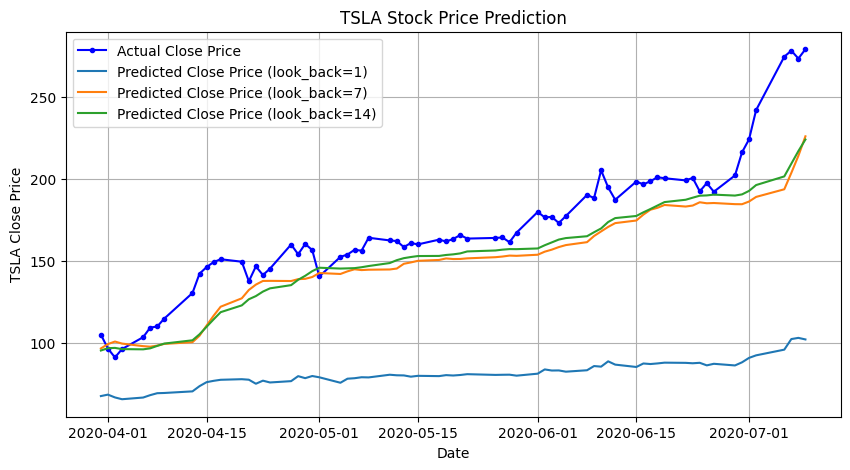

In [15]:
look_backs = [1, 7, 14]
batch_size = 16
hidden_layers = 1
epochs = 15
test_predictions = {}

for look_back in look_backs:
    close_prices = data['Close'].values.reshape(-1, 1)  # Make sure it's a 2D array

    # Create the dataset with the new look_back
    X, Y = create_dataset_new(close_prices, look_back)

    # Normalize the data BEFORE reshaping for LSTM
    X_scaler = MinMaxScaler()
    Y_scaler = MinMaxScaler()

    X_normalized = X_scaler.fit_transform(X.reshape(-1, 1))  # Reshape to 2D for scaling
    Y_normalized = Y_scaler.fit_transform(Y)

    # Now, AFTER normalizing, reshape X_normalized for LSTM input
    X_normalized = X_normalized.reshape(-1, look_back, 1)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X_normalized, Y_normalized, test_size=0.0556, shuffle=False
    )
    # Define LSTM model
    model = Sequential()
    model.add(LSTM(units=256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    # Predict using the test set
    predicted = model.predict(X_test)
    predicted = Y_scaler.inverse_transform(predicted)

    # Store predictions for plotting
    test_predictions[look_back] = predicted.flatten()

plt.figure(figsize=(10, 5))

# Plot the actual closing prices
actual_prices = data['Close'][len(X_train) + max(look_backs):].values
dates = data.index[len(X_train) + max(look_backs):]
plt.plot(dates, actual_prices, label='Actual Close Price', color='b', marker='.')

# Plot the predicted closing prices for each look-back
for look_back, predictions in test_predictions.items():
    # Determine the correct starting index for plotting predictions
    prediction_dates = dates[:len(predictions)]
    plt.plot(prediction_dates, predictions, label=f'Predicted Close Price (look_back={look_back})')

plt.title('TSLA Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('TSLA Close Price')
plt.grid(True)
plt.legend()
plt.show()